In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [61]:
df = pd.read_csv('Salary_Data.csv')
print('top 5 rows: \n', df.head(), '\n')
print('inofrmation:')
print(df.info())

top 5 rows: 
    YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 

inofrmation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


In [62]:
df=df.rename({'YearsExperience':'exp', 'Salary':'salary'}, axis=1)
df.head()

,exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [63]:
df.duplicated().value_counts()

False    30
Name: count, dtype: int64

In [64]:
print('statistics : \n', df.describe(), '\n')

statistics : 
              exp         salary
count  30.000000      30.000000
mean    5.313333   76003.000000
std     2.837888   27414.429785
min     1.100000   37731.000000
25%     3.200000   56720.750000
50%     4.700000   65237.000000
75%     7.700000  100544.750000
max    10.500000  122391.000000 



In [65]:
df.corr()

,exp,salary
exp,1.000000,0.978242
salary,0.978242,1.000000


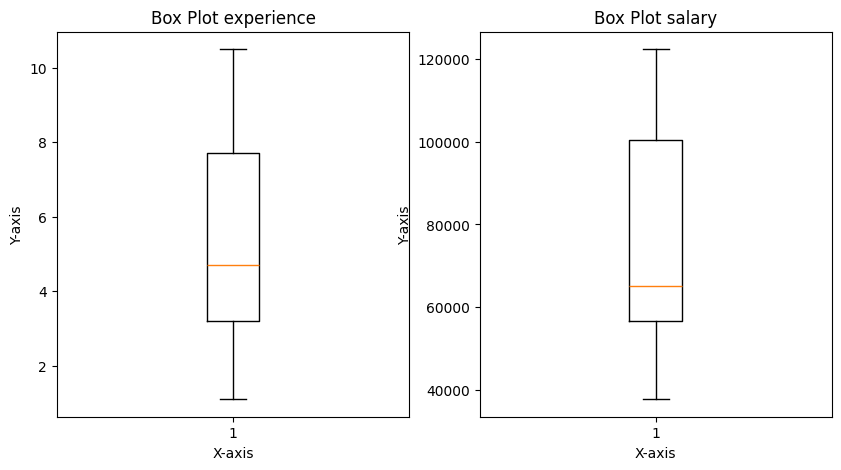

In [66]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
bp_exp = ax[0].boxplot(df['exp'])
bp_sal = ax[1].boxplot(df['salary'])
ax[0].set_title('Box Plot experience')
ax[1].set_title('Box Plot salary')
ax[0].set_xlabel('X-axis')
ax[0].set_ylabel('Y-axis')
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Y-axis')
plt.show()

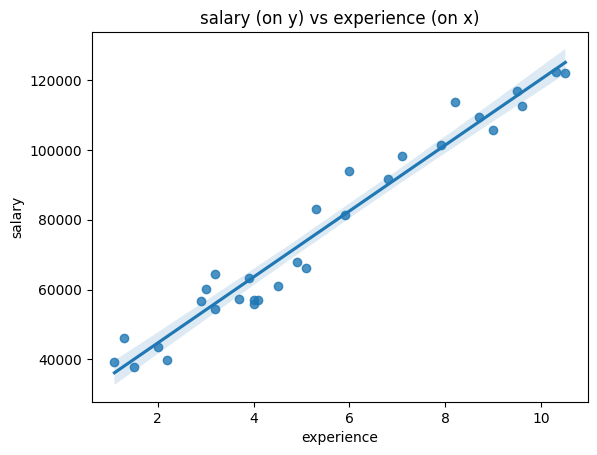

In [67]:
sns.regplot(data=df, x=df['exp'], y=df['salary'])
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('salary (on y) vs experience (on x)')
plt.show()

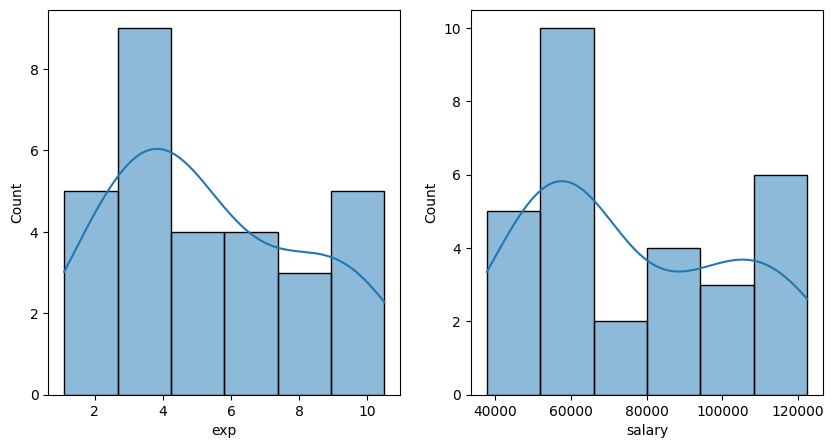

In [68]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['exp'], kde=True, ax=axes[0])
sns.histplot(df['salary'], kde=True, ax=axes[1])
plt.show()

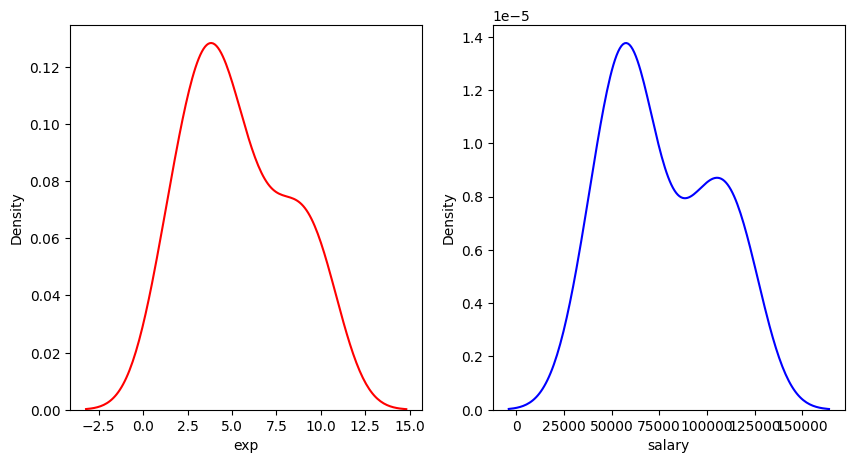

In [69]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(df['exp'],color='r',ax=axes[0])
sns.kdeplot(df['salary'],color='b',ax=axes[1])
plt.show()

# Linear Regression Model using sklearn

In [70]:
# no split
x=df[['exp']]
y=df[['salary']]

In [71]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x,y)

In [72]:
r_sq = model.score(x,y)
print(f'coefficient of determination: {r_sq}')
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.9569566641435086
intercept: [25792.20019867]
slope: [[9449.96232146]]


In [73]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

# or
#y_pred = model.intercept_ + model.coef_ * x
#print(f"predicted response:\n{y_pred}")

predicted response:
[[ 36187.15875227]
 [ 38077.15121656]
 [ 39967.14368085]
 [ 44692.12484158]
 [ 46582.11730587]
 [ 53197.09093089]
 [ 54142.08716303]
 [ 56032.07962732]
 [ 56032.07962732]
 [ 60757.06078805]
 [ 62647.05325234]
 [ 63592.04948449]
 [ 63592.04948449]
 [ 64537.04571663]
 [ 68317.03064522]
 [ 72097.0155738 ]
 [ 73987.00803809]
 [ 75877.00050238]
 [ 81546.97789525]
 [ 82491.9741274 ]
 [ 90051.94398456]
 [ 92886.932681  ]
 [100446.90253816]
 [103281.8912346 ]
 [108006.87239533]
 [110841.86109176]
 [115566.84225249]
 [116511.83848464]
 [123126.81210966]
 [125016.80457395]]


In [74]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Mean squared error: 31270951.72
Coefficient of determination: 0.96


In [75]:
# split the data

In [76]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=42) 

In [77]:
from sklearn.linear_model import LinearRegression  
model2 = LinearRegression()  
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [78]:
# The coefficients
print("Coefficients:", model2.coef_)
# The interceept
print('Intercepts:', model2.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: [[9423.81532303]]
Intercepts: [25321.58301178]
Mean squared error: 49830096.86
Coefficient of determination: 0.90


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = df[['exp']], df[['salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9347210011126782

In [80]:
y_pred = pipe.predict(X_test)
y_pred

array([[115439.88180109],
       [ 71396.10622651],
       [102320.45928951],
       [ 75144.51265839],
       [ 55465.37889103],
       [ 60150.88693088],
       [121999.59305688],
       [107005.96732936]])

In [81]:
# The coefficients
#print("Coefficients: \n", pipe.coef_)
#print('\n')
# The interceept
#print('Intercepts: \n', pipe.intercept_)
#print('\n')
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('\n')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Mean squared error: 38802588.99


Coefficient of determination: 0.93


# Linear Regression Model using Statsmodels

In [82]:
import statsmodels.formula.api as smf
smfmodel = smf.ols('salary~exp', data=df).fit()
smfmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        15:31:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
x_new = pd.DataFrame(np.array([4.0,6.0,8.0]), columns=['exp'])
x_new

y_new = smfmodel.predict(x_new)
y_new

0     63592.049484
1     82491.974127
2    101391.898770
dtype: float64

## apply tranformations

In [84]:
print('model_plain:')
model_plain = smf.ols('salary~exp',data=df).fit()
print(model_plain.summary())
print('\n')
print('model_log_ip:')
model_log_ip = smf.ols('salary~np.log(exp)',data=df).fit()
print(model_log_ip.summary())
print('\n')
print('model_exp:')
model_exp = smf.ols('salary~np.exp(exp)',data=df).fit()
print(model_exp.summary())
plt.show()
print('\n')
print('model_reciprocal:')
model_reciprocal = smf.ols('salary~np.reciprocal(exp)',data=df).fit()
print(model_reciprocal.summary())
print('\n')
print('model_sqrt:')
model_sqrt = smf.ols('salary~np.sqrt(exp)',data=df).fit()
print(model_sqrt.summary())
print('\n')
print('model_log_op:')
model_log_op = smf.ols('np.log(salary)~exp',data=df).fit()
print(model_log_op.summary())
print('\n')
print('model_log_io:')
model_log_io = smf.ols('np.log(salary)~np.log(exp)',data=df).fit()
print(model_log_io.summary())
print('\n')

model_plain:
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        15:31:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11

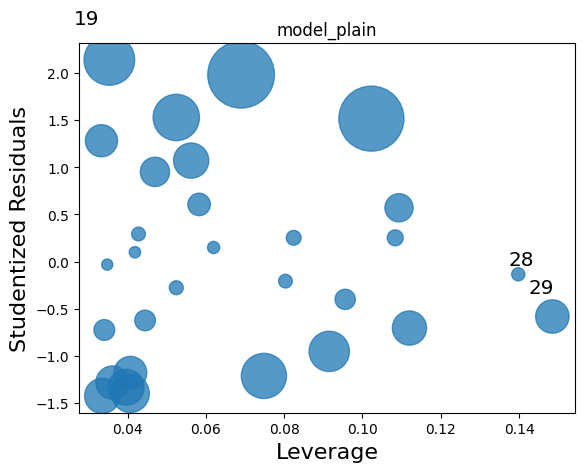

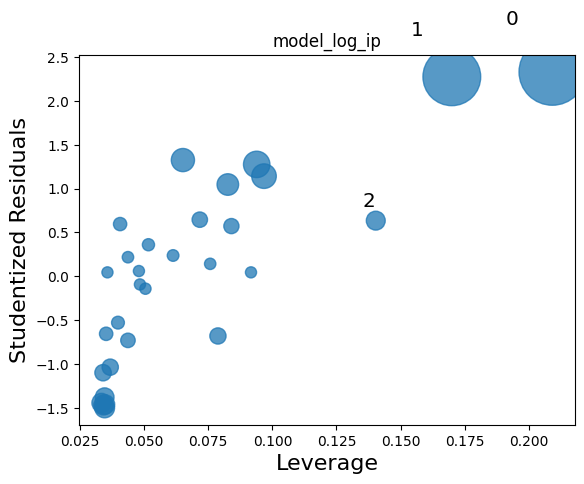

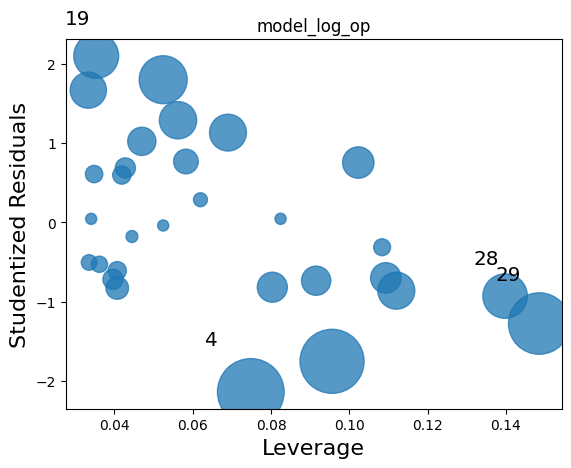

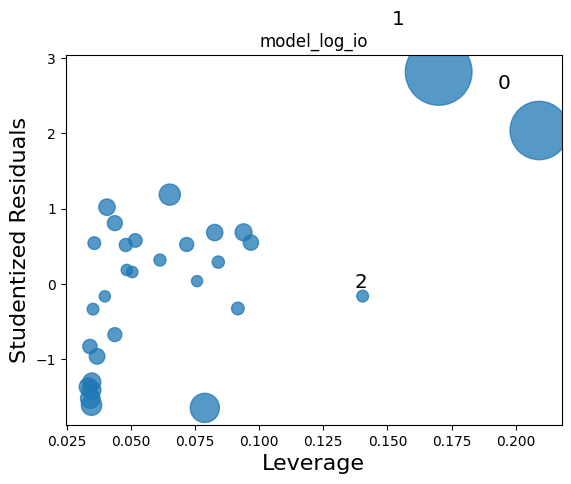

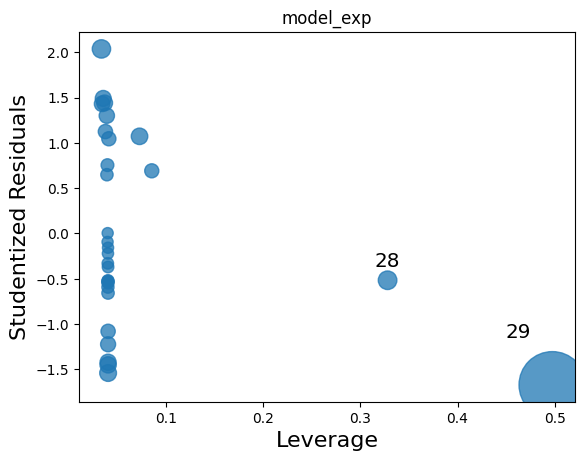

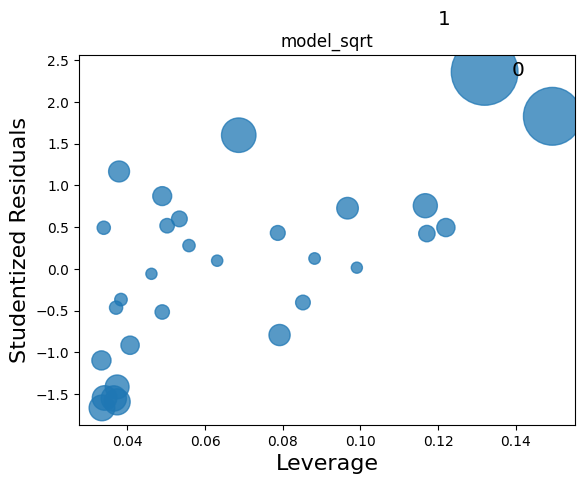

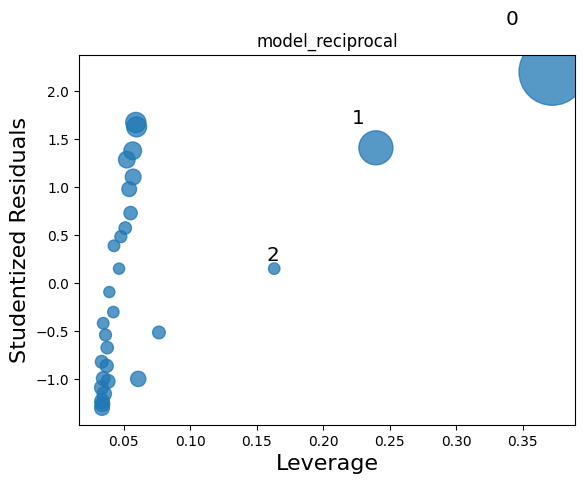

In [85]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_plain)
plt.title('model_plain')
plt.show()
influence_plot(model_log_ip)
plt.title('model_log_ip')
plt.show()
influence_plot(model_log_op)
plt.title('model_log_op')
plt.show()
influence_plot(model_log_io)
plt.title('model_log_io')
plt.show()
influence_plot(model_exp)
plt.title('model_exp')
plt.show()
influence_plot(model_sqrt)
plt.title('model_sqrt')
plt.show()
influence_plot(model_reciprocal)
plt.title('model_reciprocal')
plt.show()

In [104]:
# Cooks distance to detect outlier
from statsmodels.graphics.regressionplots import influence_plot
model_plain_influence = model_plain.get_influence()
(c, _) = model_plain_influence.cooks_distance

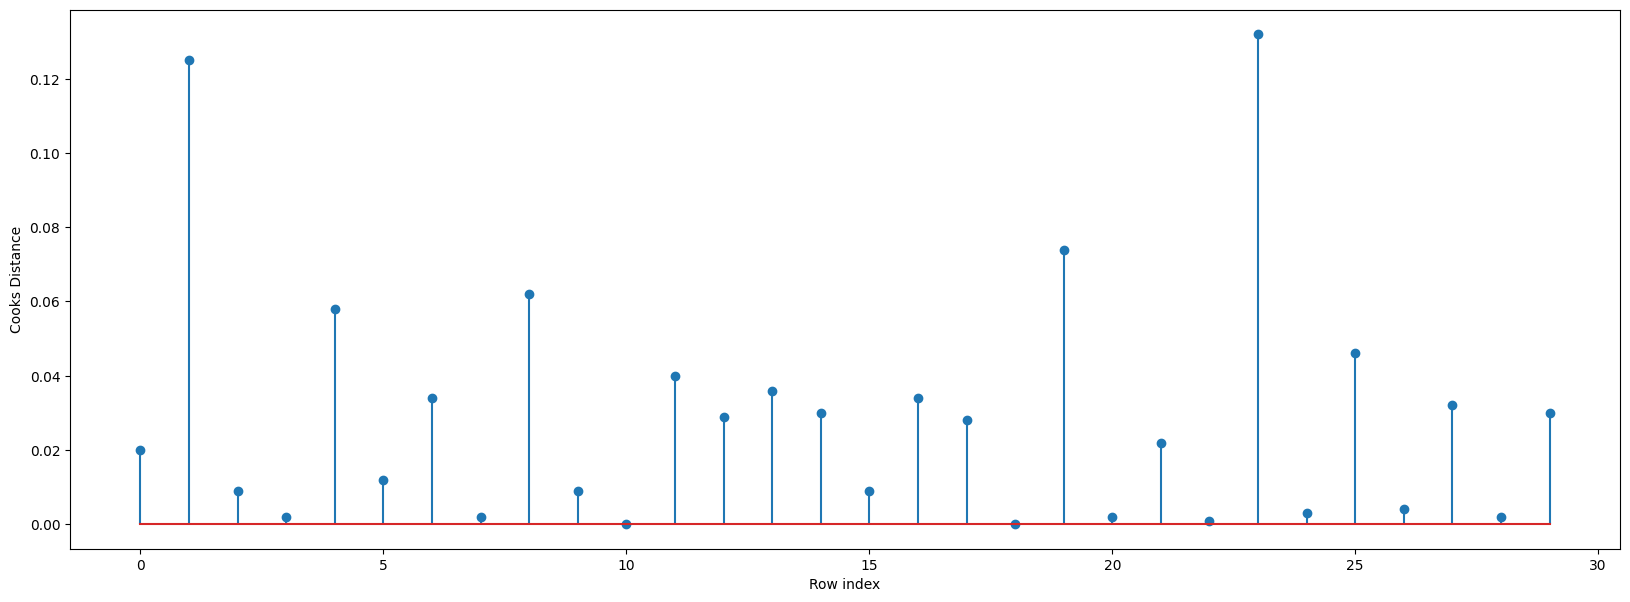

In [105]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [88]:
(np.argmax(c),np.max(c))

(23, 0.13175452313135222)

In [89]:
df_new=pd.read_csv('Salary_Data.csv')

In [90]:
df_new1=df_new.drop(df_new.index[[1,23]],axis=0).reset_index()

In [91]:
df_new1.head()

,index,YearsExperience,Salary
0,0,1.1,39343.0
1,2,1.5,37731.0
2,3,2.0,43525.0
3,4,2.2,39891.0
4,5,2.9,56642.0


In [92]:
data1=df_new1.rename(columns={"Salary":"salary","YearsExperience":"exp"})

In [93]:
model_new=smf.ols('salary~exp',data=data1).fit()

In [94]:
model_new.rsquared

0.9615558970834558

In [95]:
(model_new.rsquared,model_new.aic)

(0.9615558970834558, 562.3069121744871)